In [ ]:
import pandas as pd
import numpy as np
#from pandas import datetime
import matplotlib.pyplot as plt
from numpy import log
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import chardet
file="/content/DataPreperation.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

In [ ]:
df=pd.read_csv("/content/DataPreperation.csv")

In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
df

,Timestamp,Total Power,previous minute power,power after 15 minutes,power after 20 minutes,power after 25 minutes,power after 30 mintes,power after 30 minutes exceading 3000kw or not ?,alarm singnal
0,"Sun, 14 Aug 2016 00:01:00",1612.27,1600.52,23477.96,31969.99,40789.33,46907.75,0.0,NaN
1,"Sun, 14 Aug 2016 00:02:00",1655.42,1612.27,23437.24,31961.72,40753.48,46956.06,0.0,NaN
2,"Sun, 14 Aug 2016 00:03:00",1532.00,1655.42,23363.89,31914.29,40671.48,46916.40,0.0,NaN
3,"Sun, 14 Aug 2016 00:04:00",1585.90,1532.00,23366.98,31919.02,40700.79,46950.76,0.0,NaN
4,"Sun, 14 Aug 2016 00:05:00",1602.54,1585.90,23319.13,31943.77,40697.96,46929.68,0.0,NaN
...,...,...,...,...,...,...,...,...,...
190033,"Fri, 23 Dec 2016 07:14:00",1263.26,1326.53,19248.78,34110.23,38478.73,49165.06,0.0,NaN
190034,"Fri, 23 Dec 2016 07:15:00",1280.53,1263.26,19328.31,34007.01,38764.86,49076.51,0.0,NaN
190035,"Fri, 23 Dec 2016 07:16:00",1264.80,1280.53,19382.29,34036.86,38907.52,49039.09,0.0,NaN
190036,"Fri, 23 Dec 2016 07:17:00",1296.24,1264.80,19534.37,34055.51,39095.98,48990.55,0.0,NaN


In [ ]:
total_power=df['Total Power']
timestamp=df['Timestamp']

In [ ]:
print(total_power.isnull().sum())
total_power=total_power.dropna()
print(total_power.isnull().sum())

169
0


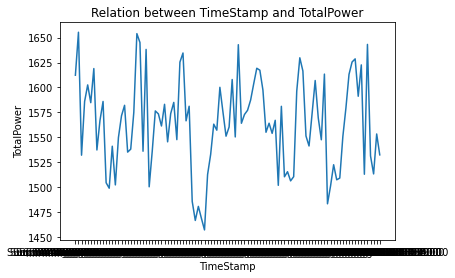

In [ ]:
plt.plot(timestamp.iloc[0:100],total_power.iloc[0:100])
plt.xlabel("TimeStamp")
plt.ylabel("TotalPower")
plt.title("Relation between TimeStamp and TotalPower")
plt.show()

The P-test 



hypothistical testing passed so we can apply theis dataset on forcasting model

In [ ]:
result = adfuller(total_power.iloc[0:1000])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.055049
p-value: 0.030064


#Applying ARIMA model

In [ ]:
model=ARIMA(total_power.iloc[0:90],order=(2,1,2))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Total Power   No. Observations:                   89
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -463.131
Method:                       css-mle   S.D. of innovations             43.964
Date:                Sun, 30 Jan 2022   AIC                            938.262
Time:                        03:32:36   BIC                            953.194
Sample:                             1   HQIC                           944.281
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1979      3.120     -0.063      0.950      -6.313       5.917
ar.L1.D.Total Power    -0.8377      0.458     -1.830      0.071      -1.735       0.060
ar.L2.D.Total Power    -0.3745      0.723     -0.518      0.606      -1.792       1.043
ma.L1.D.Total Power     0.3937      0.561      0.701      0.485      -0.707       1.494
ma.L2.D.Total Power     0.0809      0.860      0.094      0.925      -1.604       1.766
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1186           -1.1913j            1.6342           -0.3700
AR.2           -1.1186           +1.1913j            1.6342            0.3700
MA.1           -2.4342           -2.5378j            3.5165           -0.3717
MA.2           -2.4342           +2.5378j            3.5165            0.3717
-----------------------------------------------------------------------------
"""

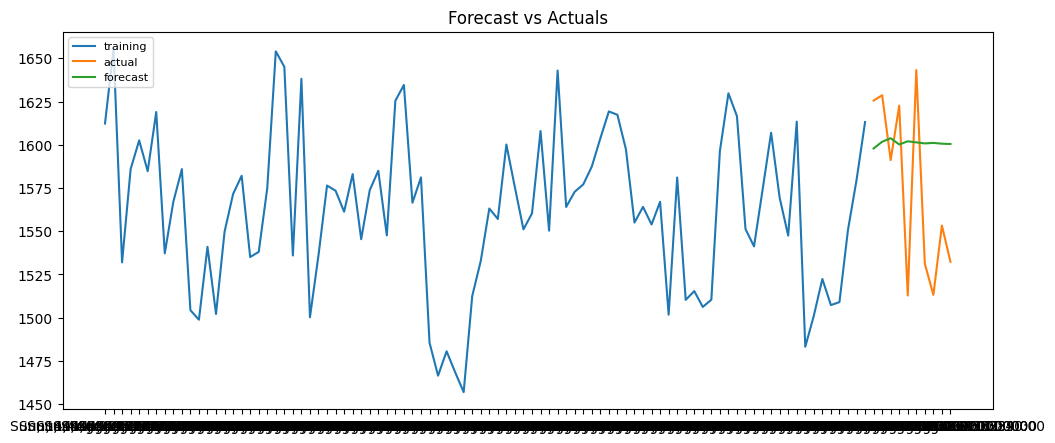

In [ ]:
fc, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=total_power.iloc[90:100])
#lower_series = pd.Series(conf[:, 0], index=total_power.iloc[90:100])
#upper_series = pd.Series(conf[:, 1], index=total_power.iloc[90:100])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(timestamp.iloc[0:90],total_power.iloc[0:90], label='training')
plt.plot(timestamp.iloc[90:100],total_power.iloc[90:100], label='actual')
plt.plot(timestamp.iloc[90:100],fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
 #                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
model = SARIMAX(total_power.iloc[0:90], order=(1, 1, 1),seasonal_order=(1,1,1,12))
fitted = model.fit(disp=False)
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        Total Power   No. Observations:                   90
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -412.144
Date:                            Sun, 30 Jan 2022   AIC                            834.288
Time:                                    03:32:47   BIC                            846.007
Sample:                                         0   HQIC                           838.976
                                             - 90                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4777      0.147      3.245      0.001       0.189       0.766
ma.L1         -0.9955      1.353     -0.736      0.462      -3.648       1.657
ar.S.L12       0.0395      0.232      0.170      0.865      -0.416       0.495
ma.S.L12      -0.9869      5.508     -0.179      0.858     -11.781       9.808
sigma2      1836.8098   1.04e+04      0.177      0.859   -1.85e+04    2.21e+04
===================================================================================
Ljung-Box (Q):                       43.74   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.32   Prob(JB):                         0.72
Heteroskedasticity (H):               0.69   Skew:                             0.22
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

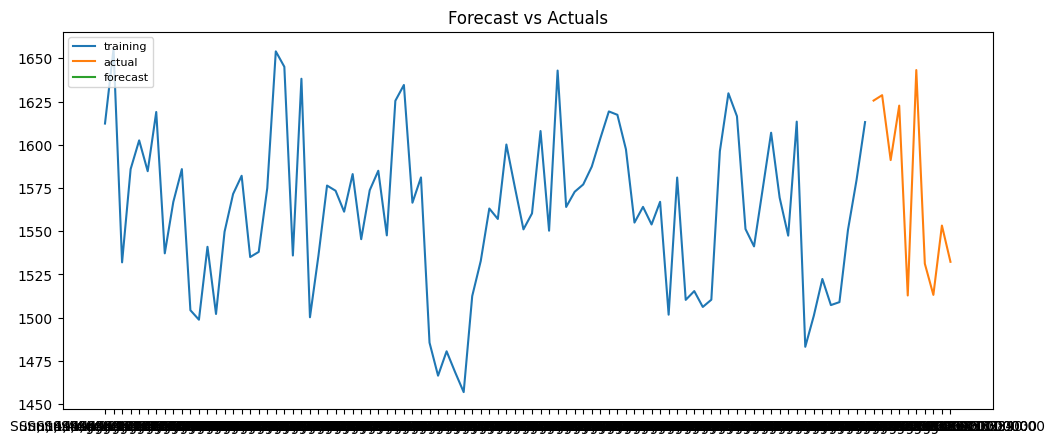

In [ ]:
fc = fitted.forecast(10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=total_power.iloc[90:100])
#lower_series = pd.Series(conf[:, 0], index=total_power.iloc[90:100])
#upper_series = pd.Series(conf[:, 1], index=total_power.iloc[90:100])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(timestamp.iloc[0:90],total_power.iloc[0:90], label='training')
plt.plot(timestamp.iloc[90:100],total_power.iloc[90:100], label='actual')
plt.plot(timestamp.iloc[90:100],fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
 #                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
   # acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [ ]:
forecast_accuracy(fc,total_power.iloc[90:100])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed 

{'corr': 0.7249505636501609,
 'mae': 39.96923451593584,
 'mape': 0.025086155011044647,
 'me': -17.850722829773076,
 'minmax': 0.024937362269521257,
 'mpe': -0.01053487218400714,
 'rmse': 45.03663328643575}

# Applying LSTM

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM,GRU
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
raw_seq=df.iloc[0:100,1:2]
raw_seq=raw_seq.to_numpy()
#print(raw_seq)
                            
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=30)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], n_features))
xtest = xtest.reshape((xtest.shape[0], xtest.shape[1], n_features))
print(xtrain.shape)

(72, 3, 1)


In [ ]:


# define model
model = Sequential()
model.add(LSTM(50, activation='LeakyReLU', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='LeakyReLU'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(xtrain, ytrain, epochs=1000, verbose=0)



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# demonstrate prediction

#x_inputI = array([1531.24,1513.19,1553.29])
#prediction should be  1532.32
yhat=[]
#x_input = x_input.reshape((1, n_steps, n_features))
for x_input in xtest:
    
  test=array([x_input[0],x_input[1],x_input[2]])
  test = test.reshape((1, n_steps, n_features))
  yhat.append(float(model.predict(test, verbose=0)))
  test=[]


# LSTM

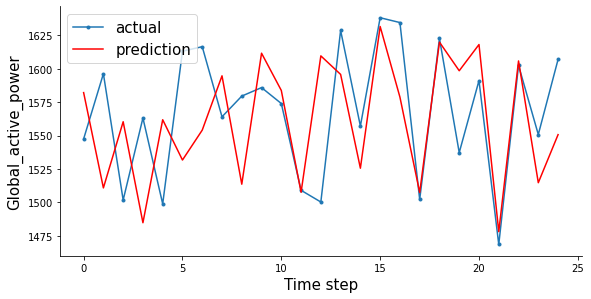

In [ ]:
aa=[x for x in range(25)]
plt.figure(figsize=(8,4))
plt.plot(aa, ytest, marker='.', label="actual")
plt.plot(aa, yhat, 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

# Implemetation of GRU

In [ ]:
# define model
model = Sequential()
model.add(GRU(50, activation='ReLU', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(GRU(50, activation='ReLU'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model


In [ ]:
model.fit(xtrain, ytrain, epochs=1000, verbose=0)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 50)             7950      
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23,301
Trainable params: 23,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# demonstrate prediction

#x_inputI = array([1531.24,1513.19,1553.29])
#prediction should be  1532.32
yhat=[]
#x_input = x_input.reshape((1, n_steps, n_features))
for x_input in xtest:
    
  test=array([x_input[0],x_input[1],x_input[2]])
  test = test.reshape((1, n_steps, n_features))
  yhat.append(float(model.predict(test, verbose=0)))
  test=[]


In [ ]:
import seaborn as sns

# GRU

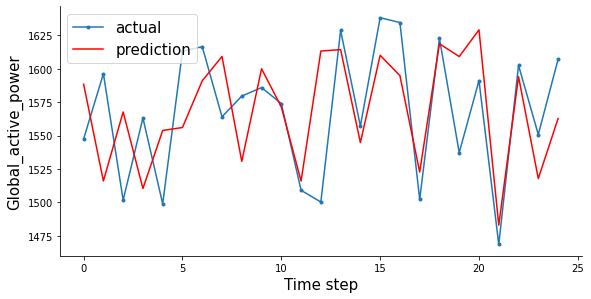

In [ ]:
aa=[x for x in range(25)]
plt.figure(figsize=(8,4))
plt.plot(aa, ytest, marker='.', label="actual")
plt.plot(aa, yhat, 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
pip install pytorchts

In [ ]:
pip install gluonts

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

#from pts.dataset import ListDataset
from pts.model.deepar import DeepAREstimator
from pts import Trainer
from gluonts.dataset.common import ListDataset
#from pts.dataset import to_pandas

In [ ]:
df=pd.read_csv("/content/DataPreperation.csv")

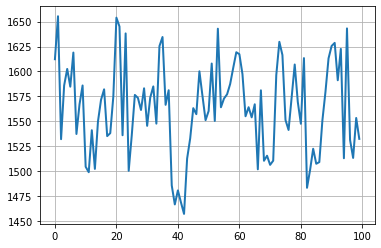

In [ ]:
total_power.iloc[0:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [ ]:
df.index[0]

0

In [ ]:
training_data = ListDataset(
    [{"start": df.index[0], "target": df.iloc[0:90]}],
    freq = "5min"
)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

estimator = DeepAREstimator(freq="5min",
                            prediction_length=1,
                            input_size=90,
                            trainer=Trainer(epochs=15,
                                            device=device))


In [ ]:
total_power=df['Total Power']
timestamp=df['Timestamp']

In [ ]:
predictor=estimator.train(training_data=training_data)

  0%|          | 0/49 [00:00<?, ?it/s]

ValueError: ignored